In [229]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [230]:
file_dir = os.path.join(os.getcwd(), 'openpowerlifting-2020-02-15', 'openpowerlifting-2020-02-15.csv')
data = pd.read_csv(file_dir)

# list(data.columns)

In [232]:

#find max DL 
data['MaxDL'] = data[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)

data.loc[data['MaxDL'] < 0,'MaxDL'] = np.nan

#set fed lists
iplList = ['IPL', 'USPA', 'AusPL', 'CPL', 'IrishPO', 'KuwaitPL', 'LMP', 'IPL-NZ', 'UPL', 
    'THSPA', 'THSWPA', 'PA', 'RPS', 'ADFPF', 'WDFPF']

ipfList = ['AfricanPF', 'AsianPF', 'CommonwealthPF', 'EPF', 'FESUPO', 'NAPF', 'NordicPF',
    'OceaniaPF', 'ORPF', 'USAPL', 'BP', 'EPA', 'ScottishPL', 'WelshPA', 'FALPO', 
    'CPU', 'HPLS', 'CSST', 'DSF', 'SVNL', 'FFForce', 'BVDK', 'KRAFT', 'IrishPF', 'JPA',
    'KPF', 'LPF', 'FEMEPO', 'NPB', 'NZPF', 'NSF', 'PAP', 'PZKFiTS', 'FPR', 'PLZS', 
    'AEP', 'SSF', 'ThaiPF', 'UkrainePF', 'IPF', 'VPF']

data.loc[data['Federation'].isin(ipfList),'IPFFed'] = 'Yes'
data.loc[data['Federation'].isin(ipfList) == False,'IPFFed'] = 'No'

data.loc[data['Federation'].isin(iplList),'IPLFed'] = 'Yes'

data['DLBarType'] = ''

data.loc[(data['Federation'].isin(ipfList)) & (data['Equipment'] == 'Raw') & (data['Event'] == 'SBD') & (data['Sex'] == 'M'),'DLBarType'] = 'Stiff'
data.loc[(data['Federation'].isin(ipfList) == False) & (data['Equipment'] == 'Raw') & (data['Event'] == 'SBD') & (data['Sex'] == 'M') & (data['Tested'] == 'Yes'),'DLBarType'] = 'Deadlift'



ipfdf = data[data['Federation'].isin(ipfList)]

ipfdf = ipfdf[ipfdf['Equipment'].isin(['Raw'])]
ipfdf = ipfdf[ipfdf['Event'] == 'SBD']
ipfdf = ipfdf[ipfdf['Sex'] == 'M']

nonipfdf = data[data['Federation'].isin(ipfList) == False]
nonipfdf = nonipfdf[nonipfdf['Equipment'].isin(['Raw'])]
nonipfdf = nonipfdf[nonipfdf['Event'] == 'SBD']
nonipfdf = nonipfdf[nonipfdf['Sex'] == 'M']

nonipftesteddf = nonipfdf[nonipfdf['Tested'] == 'Yes']


In [258]:
# check leftover feds. ie. not IPL/IPF
pd.set_option('display.max_rows', 100)

tempFeds = data.loc[(data['Federation'].isin(iplList) == False) & (data['Federation'].isin(ipfList) == False) & (data['Tested'] == 'Yes'),'Federation'].unique().tolist()

print(data.loc[(data['Federation'].isin(tempFeds)) & (data['Tested'] == 'Yes')].groupby(['Federation']).size().sort_values(ascending=False))

pd.set_option('display.max_rows', 10)


Federation
WABDL           29325
NASA            26088
ADFPA           13703
NAP             13353
WPC-RUS         11935
APF             11136
WPC             10896
AAU              9659
RPU              9380
WNPF             8345
RAW              8221
WRPF             7776
IPA              6284
BAWLA            5476
APA              3889
WPC-UKR          3849
WPPO             2744
BPU              2573
BDFPA            2486
FIPL             2464
UPA              2464
RAW-CAN          2237
GPA              2185
NIPF             2077
UPC              1730
FHSAA            1604
WPA              1545
WPA-RUS          1475
LJTF             1402
OEVK             1389
SAPF             1327
BVDG             1315
WPU-RUS          1274
CPF              1255
APU              1207
WPF              1122
NORCAL           1012
AAPLF             989
IBSA              970
IDFPF             899
ADAU              781
USPF              765
BelPF             719
SDFPF             699
WPAU              526

In [276]:
print("Stiff Bar Entries:", len(data.loc[(data['DLBarType'] == 'Stiff') & (data['MaxDL'] >= 0),'MaxDL']))
print("Deadlift Bar Entries:", len(data.loc[(data['DLBarType'] == 'Deadlift') & (data['MaxDL'] >= 0),'MaxDL']))

Stiff Bar Entries: 107747
Deadlift Bar Entries: 23134


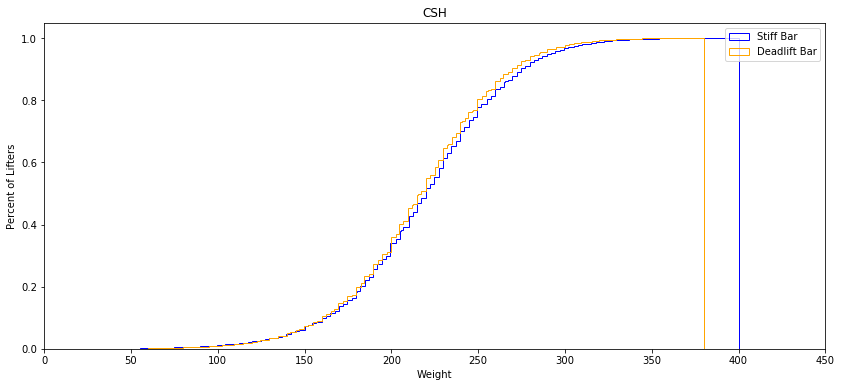

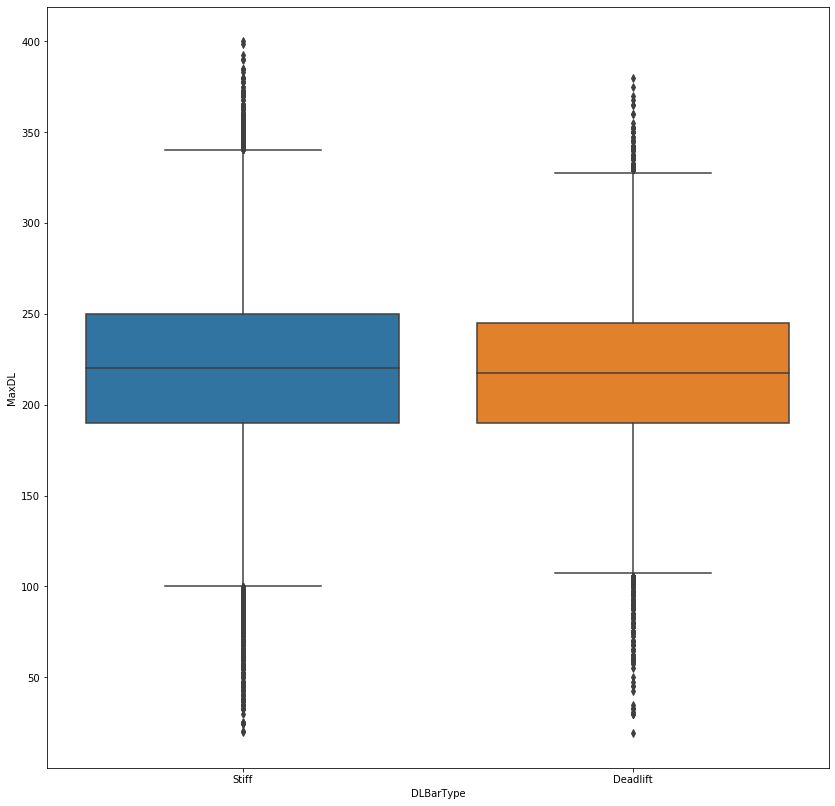

In [255]:

plt.figure(figsize=(14,6))
plt.hist(data.loc[data['DLBarType'] == 'Stiff','MaxDL'], bins=500, histtype='step', normed=1, cumulative=True, color='blue', label='Stiff Bar')
plt.hist(data.loc[data['DLBarType'] == 'Deadlift','MaxDL'], bins=500, histtype='step', normed=1, cumulative=True, color='orange', label='Deadlift Bar')
plt.xlim(0, 450)
plt.legend(loc='left')
plt.title('CSH')
plt.ylabel('Percent of Lifters')
plt.xlabel('Weight')
plt.show()


# plt.figure(figsize=(14,8))
# plt.hist(data.loc[data['DLBarType'] == 'Stiff','MaxDL'], bins=30, alpha=0.5, normed=1, label='Stiff Bar')
# plt.hist(data.loc[data['DLBarType'] == 'Deadlift','MaxDL'], bins=30, alpha=0.5, normed=1, label='Deadlift Bar')
# plt.legend(loc='upper right')
# plt.show()

plt.figure(figsize=(14,14))
ax = sns.boxplot(x='DLBarType', y='MaxDL', data=data.loc[data['DLBarType'] != ''])
plt.show()


In [236]:
from scipy import stats

stats.ks_2samp(dltesteddf, dlnonipftested)

Ks_2sampResult(statistic=0.03318555453032168, pvalue=1.2117251709991842e-18)

In [281]:
#outlier removal  

stiffBarPulls = data.loc[(data['DLBarType'] == 'Stiff') & (data['MaxDL'] >= 0),'MaxDL']
stiffBarPulls = stiffBarPulls[stiffBarPulls.between(stiffBarPulls.quantile(.15), stiffBarPulls.quantile(.85))]

DLBarPulls = data.loc[(data['DLBarType'] == 'Deadlift') & (data['MaxDL'] >= 0),'MaxDL']
DLBarPulls = DLBarPulls[DLBarPulls.between(DLBarPulls.quantile(.15), DLBarPulls.quantile(.85))]
# x = x[x.between(x.quantile(.15), x.quantile(.85))]

<Figure size 432x288 with 0 Axes>

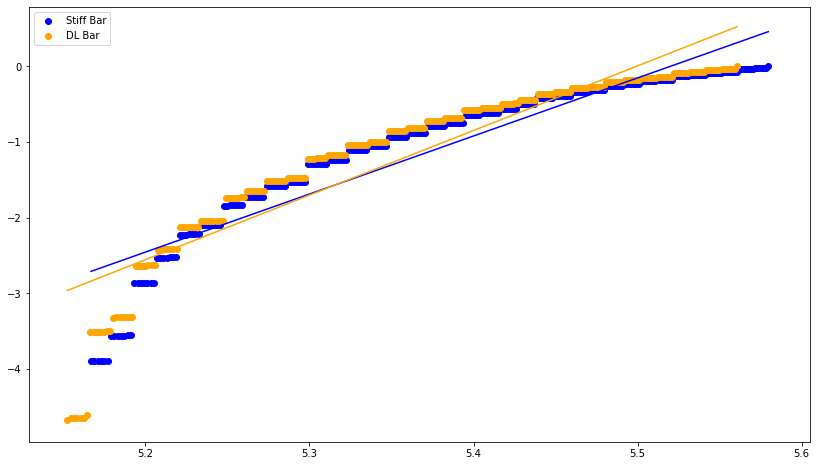

In [283]:
yStiff, xStiff, axStiff = plt.hist(stiffBarPulls, bins=250, histtype='step', normed=1, cumulative=True, color='blue', label='Stiff Bar')

yDL, xDL, axDL = plt.hist(DLBarPulls, bins=250, histtype='step', normed=1, cumulative=True, color='orange', label='Deadlift Bar')

plt.clf()

xStiff = np.delete(xStiff, 0)
xDL = np.delete(xDL, 0)
logxStiff = np.log(xStiff)
logyStiff = np.log(yStiff)
logxDL = np.log(xDL)
logyDL = np.log(yDL)

mStiff, bStiff = np.polyfit(logxStiff, logyStiff, 1)
mDL, bDL = np.polyfit(logxDL, logyDL, 1)

plt.figure(figsize=(14,8))
plt.scatter(logxStiff, logyStiff, label = 'Stiff Bar', color = 'blue')
plt.plot(logxStiff, mStiff*logxStiff + bStiff, color = 'blue')
plt.scatter(logxDL, logyDL, label = 'DL Bar', color = 'orange')
plt.plot(logxDL, mDL*logxDL + bDL, color = 'orange')

plt.legend(loc='left')
# plt.title('Scatter plot pythonspot.com')
# plt.xlabel('Weight')
# plt.ylabel('y')
plt.show()

